## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv('travel_ticket.csv', parse_dates=['Created','DepartureTime','CancelTime'],encoding='utf-8')
data.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaT,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaT,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaT,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaT,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaT,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837


### Data Understanding

In [3]:
print (f'Data shape: {data.shape}')

Data shape: (101017, 22)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Created               101017 non-null  datetime64[ns]
 1   CancelTime            15326 non-null   datetime64[ns]
 2   DepartureTime         101017 non-null  datetime64[ns]
 3   BillID                101017 non-null  int64         
 4   TicketID              101017 non-null  float64       
 5   ReserveStatus         101017 non-null  int64         
 6   UserID                42543 non-null   float64       
 7   Male                  101017 non-null  bool          
 8   Price                 101017 non-null  float64       
 9   CouponDiscount        101017 non-null  float64       
 10  From                  101017 non-null  object        
 11  To                    101017 non-null  object        
 12  Domestic              101017 non-null  int64         
 13 

### Check and Fix Data (if necessary)

In [5]:
#check objects data dtypes
categorical_columns = data.select_dtypes(include='object')
for columns in categorical_columns:
  print(data[columns].value_counts())
  print('====================')

From
تهران           29518
مشهد            11421
اصفهان           9473
شیراز            6332
یزد              3755
                ...  
دشتی (بوشهر)        1
سپیددشت             1
آغری                1
اسلامشهر            1
آلانیا              1
Name: count, Length: 226, dtype: int64
To
تهران       29686
مشهد        13242
اصفهان       6956
شیراز        4839
یزد          3657
            ...  
استهبان         1
دهگلان          1
عنبرآباد        1
اسلامشهر        1
دوربان          1
Name: count, Length: 307, dtype: int64
VehicleType
4 ستاره اتوبوسي صبا                                                                                     6221
3 ستاره 6 تخته پارسي                                                                                    3021
25 نفره (VIP)                                                                                           2237
4 ستاره 4 تخته غزال                                                                                     1982
4 ستاره اتوبوسي نگين      

In [6]:
#delete effectless_cols

def Del_Effectless_Cols(data):
    for col in ['CancelTime','BillID','UserID','VehicleType','VehicleClass','BuyerMobile','HashEmail','HashPassportNumber_p','NationalCode']:
        data = data.drop(labels=col, inplace=False, axis=1)
    return data

data = Del_Effectless_Cols(data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Created         101017 non-null  datetime64[ns]
 1   DepartureTime   101017 non-null  datetime64[ns]
 2   TicketID        101017 non-null  float64       
 3   ReserveStatus   101017 non-null  int64         
 4   Male            101017 non-null  bool          
 5   Price           101017 non-null  float64       
 6   CouponDiscount  101017 non-null  float64       
 7   From            101017 non-null  object        
 8   To              101017 non-null  object        
 9   Domestic        101017 non-null  int64         
 10  TripReason      101017 non-null  object        
 11  Vehicle         101017 non-null  object        
 12  Cancel          101017 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 9.3+ MB


In [8]:
#change bool data type to int64
data['Male'] = data['Male'].astype('int64')

In [9]:
#change object data type to categorical

data['TripReason'] = pd.Categorical(
    data['TripReason'], categories=['Work', 'Int'], ordered = False
    )

data['Vehicle'] = pd.Categorical(
    data['Vehicle'], categories=['Bus', 'Train', 'Plane', 'InternationalPlane'], ordered = True
    )


In [10]:
data.describe()

,Created,DepartureTime,TicketID,ReserveStatus,Male,Price,CouponDiscount,Domestic,Cancel
count,101017,101017,1.010170e+05,101017.000000,101017.000000,1.010170e+05,1.010170e+05,101017.000000,101017.000000
mean,2022-07-20 11:07:08.617269248,2022-07-26 10:57:55.516794368,4.941459e+06,3.158053,0.611234,3.203236e+06,4.777172e+03,0.992130,0.151618
min,2022-01-31 21:03:45.487000,2022-01-31 23:59:00,1.015856e+06,2.000000,0.000000,-1.514000e+06,-2.000000e+03,0.000000,0.000000
25%,2022-05-22 21:21:11.663000064,2022-05-29 16:15:00,2.851847e+06,2.000000,0.000000,1.075000e+06,0.000000e+00,1.000000,0.000000
50%,2022-08-04 14:07:44.440000,2022-08-11 20:20:00,3.079610e+06,3.000000,1.000000,1.690000e+06,0.000000e+00,1.000000,0.000000
75%,2022-09-24 11:56:03.720000,2022-09-29 11:30:00,7.433800e+06,4.000000,1.000000,3.043500e+06,0.000000e+00,1.000000,0.000000
max,2022-11-03 00:19:24.717000,2023-03-08 13:00:00,7.782877e+06,5.000000,1.000000,3.837646e+08,1.443333e+07,1.000000,1.000000
std,NaN,NaN,2.410495e+06,1.073276,0.487472,7.349195e+06,6.127747e+04,0.088363,0.358652


There are negative value on Price and Discount Coupun that shouldn't be there. there for handle the values if the percentage low would be recommended.

In [11]:
# Make sure columns_to_check have been identificated
columns_to_check = ['Price', 'CouponDiscount']

if len(columns_to_check) > 0:
    print("ANALYST NEGATIVE DATA:")
    print("=====================")

    # Look for rows that have negative values ​​in any of the checked columns.
    negative_mask = (data[columns_to_check] < 0).any(axis=1)
    negative_data = data[negative_mask]

    # percentage check
    pct_negative = (len(negative_data) / len(data)) * 100
    print(f"Netagive value percentage: {pct_negative:.2f}%")
    print(f"Number of rows with negative values: {len(negative_data)}")

    # Check which columns have negative values.
    print("\nColumns with negative values:")
    for col in columns_to_check:
        neg_count = (data[col] < 0).sum()
        if neg_count > 0:
            print(f"  {col}: {neg_count} negative value")


ANALYST NEGATIVE DATA:
Netagive value percentage: 0.00%
Number of rows with negative values: 2

Columns with negative values:
  Price: 1 negative value
  CouponDiscount: 1 negative value


because the amount of negative value small, i would drop those value from the data.

In [12]:
# Only delete rows with negative values ​​in a specific column
columns_to_check = ['Price', 'CouponDiscount']
mask = True

for col in columns_to_check:
    if col in data.columns:
        mask = mask & (data[col] >= 0)

data_clean = data[mask]

print(f"Before: {len(data)} row")
print(f"After: {len(data_clean)} row")

Before: 101017 row
After: 101015 row


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'CouponDiscount'}>]], dtype=object)

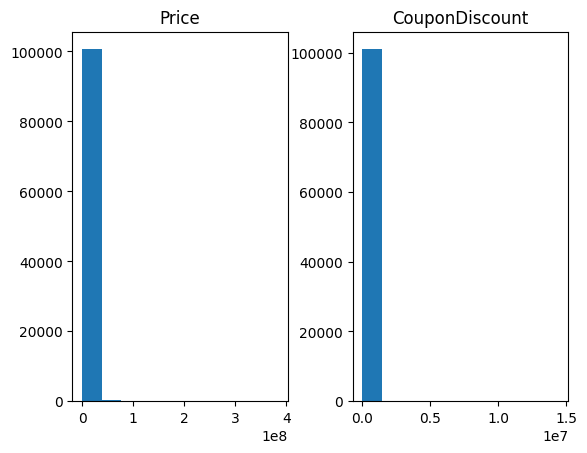

In [13]:
data_clean[['Price','CouponDiscount']].hist(grid=False)

**Observations:**
- There may be outliers in the `Price` and `CouponDiscount` columns that will need to be dealt with later.

### Handle Duplicated Data

In [14]:
#Check ratio of unique values
len(data.drop_duplicates(subset = ['TicketID'])) / len(data_clean)

0.9992377369697569

In [15]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,Created,DepartureTime,TicketID,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
4302,2022-07-28 12:05:44.417,2022-08-08 21:40:00,7452955.0,3,0,1225000.0,0.0,مشهد (خراسان ),تهران,1,Int,Bus,0
43959,2022-08-04 15:20:33.203,2022-08-06 04:40:00,1067895.0,5,1,5870000.0,80000.0,اهواز,تهران,1,Int,Plane,0
76089,2022-07-28 12:05:44.417,2022-08-08 21:40:00,7452955.0,3,0,1225000.0,0.0,مشهد (خراسان ),تهران,1,Int,Bus,0
82091,2022-08-04 15:20:33.203,2022-08-06 04:40:00,1067895.0,5,1,5870000.0,80000.0,اهواز,تهران,1,Int,Plane,0


There are two duplicates found.

In [16]:
# Save info before delete the duplicate
print(f"Shape before: {data_clean.shape}")

# Hapus the duplicate (only save the first unique value)
df_clean = data_clean.drop_duplicates()

print(f"Shape after: {df_clean.shape}")
print(f"deleted row: {len(data_clean) - len(df_clean)}")

Shape before: (101015, 13)
Shape after: (101013, 13)
deleted row: 2


## Data Cleaning_EDA

In [17]:
data_eda = df_clean.copy()

### Handle Missing Data

In [18]:
#check missing values
missing_eda = data_eda.isnull().sum().reset_index()
missing_eda.columns = ['features', 'missing_values']
missing_eda['percentage'] = (missing_eda['missing_values']/len(data_eda)) *100
missing_eda

,features,missing_values,percentage
0,Created,0,0.0
1,DepartureTime,0,0.0
2,TicketID,0,0.0
3,ReserveStatus,0,0.0
4,Male,0,0.0
5,Price,0,0.0
6,CouponDiscount,0,0.0
7,From,0,0.0
8,To,0,0.0
9,Domestic,0,0.0


There is no missing value in the selected data.

## Data Manipulation_EDA

In [19]:
data_eda['PriceGroup'] = data_eda['Price'].clip(lower=0)

# Kemudian lakukan cut dengan include_lowest=True
data_eda['PriceGroup'] = pd.cut(data_eda['Price'],
                                         bins=[0, 20000, 25000, 30000, 35000, 40000, float('inf')],
                                         labels=['<20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000+'],
                                         include_lowest=True)

In [20]:
data_eda['CouponDiscount'] = data_eda['CouponDiscount'].clip(lower=0)

# Kemudian lakukan cut dengan include_lowest=True
data_eda['CouponDiscountGroup'] = pd.cut(data_eda['CouponDiscount'],
                                         bins=[0, 20000, 25000, 30000, 35000, 40000, float('inf')],
                                         labels=['<20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000+'],
                                         include_lowest=True)

In [21]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101013 entries, 0 to 101016
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Created              101013 non-null  datetime64[ns]
 1   DepartureTime        101013 non-null  datetime64[ns]
 2   TicketID             101013 non-null  float64       
 3   ReserveStatus        101013 non-null  int64         
 4   Male                 101013 non-null  int64         
 5   Price                101013 non-null  float64       
 6   CouponDiscount       101013 non-null  float64       
 7   From                 101013 non-null  object        
 8   To                   101013 non-null  object        
 9   Domestic             101013 non-null  int64         
 10  TripReason           101013 non-null  category      
 11  Vehicle              101013 non-null  category      
 12  Cancel               101013 non-null  int64         
 13  PriceGroup         

In [22]:
print(f'Data Shape: {data_eda.shape}')

Data Shape: (101013, 15)


In [23]:
data_eda.to_csv('EDA_cleaned.csv', index=False)

## Data Cleaning_Machine Learning

In [24]:
data_ml = df_clean.copy()

In [25]:
data_ml = data_ml.set_index("TicketID").drop(columns=["TicketID"], errors="ignore")

In [26]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(data_ml, test_size = 0.2, random_state=42)

### Handle Missing Data for Training Set

In [27]:
#check missing values in training data
missing_ml = train_df.isnull().sum().reset_index()
missing_ml.columns = ['features', 'missing_values']
missing_ml['percentage'] = (missing_ml['missing_values']/len(train_df)) *100
missing_ml

,features,missing_values,percentage
0,Created,0,0.0
1,DepartureTime,0,0.0
2,ReserveStatus,0,0.0
3,Male,0,0.0
4,Price,0,0.0
5,CouponDiscount,0,0.0
6,From,0,0.0
7,To,0,0.0
8,Domestic,0,0.0
9,TripReason,0,0.0


There is no Missing value on selected data.

### Encode Categorical Variables for Training Set

In [28]:
train_encoded = train_df.copy()


In [29]:
#encode TripReason
train_encoded['TripReason'] = train_encoded['TripReason'].map({'Work': 0, 'Int': 1}).astype(int)

In [30]:
#mean encoding for From, To, and Vehicle
occ_mean = train_encoded.groupby('From', observed=True)['Cancel'].mean().to_dict()
print(occ_mean)

prod_mean = train_encoded.groupby('To', observed=True)['Cancel'].mean().to_dict()
print(prod_mean)

desig_mean = train_encoded.groupby('Vehicle', observed=True)['Cancel'].mean().to_dict()
print(desig_mean)

train_encoded['From'] = train_encoded['From'].map(occ_mean).astype(float)
train_encoded['To'] = train_encoded['To'].map(prod_mean).astype(float)
train_encoded['Vehicle'] = train_encoded['Vehicle'].map(desig_mean).astype(float)

{'آبادان': 0.11547344110854503, 'آباده': 0.08333333333333333, 'آبیک': 0.0, 'آدانا': 0.0, 'آزادور': 0.0, 'آستارا': 0.12, 'آستانه اشرفیه': 0.25, 'آلانیا': 0.0, 'آمستردام': 0.0, 'آمل': 0.16393442622950818, 'آنتالیا': 0.0, 'آنکارا': 0.0, 'ابوظبی': 0.0, 'اراک': 0.11413043478260869, 'ارجان': 0.0, 'اردبیل': 0.11196911196911197, 'اردکان': 0.5, 'اردکان (یزد)': 0.15151515151515152, 'ارومیه': 0.15135135135135136, 'ازمیر': 0.0, 'ازنا': 0.21428571428571427, 'استانبول': 0.03669724770642202, 'استکهلم': 0.6666666666666666, 'اسفراین': 0.0, 'اسلام آباد غرب': 0.0, 'اسلامشهر': 1.0, 'اصفهان': 0.1460212201591512, 'اقلید': 0.022222222222222223, 'اندیمشک': 0.16666666666666666, 'اهر': 0.0, 'اهواز': 0.2079002079002079, 'ایذه': 0.10638297872340426, 'ایرانشهر': 0.09166666666666666, 'ایروان': 0.5, 'ایلام': 0.18269230769230768, 'بابل': 0.1791044776119403, 'بابلسر': 0.25, 'باتومی': 0.0, 'بادرود': 1.0, 'بافت': 0.0, 'بافق': 0.35714285714285715, 'بانه': 0.0, 'بجستان': 1.0, 'بجنورد': 0.14754098360655737, 'برخوار': 0.105

In [31]:
train_encoded.head()

,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
TicketID,,,,,,,,,,,,
2990278.0,2022-09-04 16:11:45.383,2022-09-23 10:15:00,4,0,4673500.0,0.0,0.192497,0.136489,1,1,0.183775,1
2861370.0,2022-06-22 10:39:40.667,2022-07-04 21:55:00,2,1,2603000.0,3825.0,0.153596,0.147591,1,0,0.183775,0
7235232.0,2022-06-06 20:37:28.597,2022-06-07 11:00:00,3,0,440000.0,0.0,0.143342,0.144796,1,0,0.132709,0
7028240.0,2022-04-12 11:55:14.117,2022-04-13 00:45:00,3,1,930000.0,0.0,0.102362,0.161992,1,0,0.132709,0
2309788.0,2022-08-17 10:27:59.540,2022-08-19 06:00:00,5,0,10191000.0,0.0,0.153596,0.177178,1,1,0.128494,0


### Encode Categorical Variables for Testing Set

In [32]:
test_encoded = test_df.copy()

In [33]:
#encode TripReason
test_encoded['TripReason'] = test_encoded['TripReason'].map({'Work': 0, 'Int': 1}).astype(int)


In [34]:
#mean encoding for From, To, and Vehicle
occ_mean_test = test_encoded.groupby('From', observed=True)['Cancel'].mean().to_dict()
print(occ_mean_test)

prod_mean_test = test_encoded.groupby('To', observed=True)['Cancel'].mean().to_dict()
print(prod_mean_test)

desig_mean_test = test_encoded.groupby('Vehicle', observed=True)['Cancel'].mean().to_dict()
print(desig_mean_test)

test_encoded['From'] = test_encoded['From'].map(occ_mean_test).astype(float)
test_encoded['To'] = test_encoded['To'].map(prod_mean_test).astype(float)
test_encoded['Vehicle'] = test_encoded['Vehicle'].map(desig_mean_test).astype(float)

{'آبادان': 0.09174311926605505, 'آباده': 0.2, 'آبیک': 0.0, 'آزادور': 0.0, 'آستارا': 0.0, 'آستانه اشرفیه': 0.0, 'آغری': 0.0, 'آمل': 0.0, 'آنتالیا': 0.0, 'آنکارا': 0.0, 'اراک': 0.1452513966480447, 'اردبیل': 0.16666666666666666, 'اردکان': 0.0, 'اردکان (یزد)': 0.4, 'ارومیه': 0.09401709401709402, 'ازمیر': 0.0, 'استانبول': 0.0, 'اسفراین': 0.3333333333333333, 'اصفهان': 0.13657527159855148, 'اقلید': 0.25, 'اندیمشک': 0.15384615384615385, 'اهر': 0.0, 'اهواز': 0.1836734693877551, 'ایذه': 0.23529411764705882, 'ایرانشهر': 0.09836065573770492, 'ایلام': 0.15625, 'ایوان': 0.0, 'بابل': 0.19480519480519481, 'بابلسر': 0.2222222222222222, 'بافت': 0.0, 'بافق': 0.0, 'بانه': 0.0, 'بجنورد': 0.125, 'برخوار': 0.05555555555555555, 'برداسکن': 0.0, 'بروجرد': 0.07142857142857142, 'بروجن': 0.0, 'بشرویه': 0.0, 'بغداد': 0.3333333333333333, 'بم': 0.125, 'بمبئی': 1.0, 'بندر لنگه': 0.4, 'بندرانزلی': 0.09302325581395349, 'بندرعباس': 0.16627634660421545, 'بهبهان': 0.15625, 'بهشهر': 0.17647058823529413, 'بوشهر': 0.153846153

In [35]:
test_encoded.head()

,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
TicketID,,,,,,,,,,,,
2843945.0,2022-06-15 20:30:01.780,2022-06-27 20:55:00,2,0,2603000.0,0.0,0.198939,0.164586,1,0,0.187991,0
7451522.0,2022-07-27 22:01:24.917,2022-07-28 07:30:00,3,0,1080000.0,0.0,0.162498,0.170000,1,1,0.133190,0
2977455.0,2022-08-29 20:27:33.913,2022-09-21 16:25:00,2,1,4832000.0,0.0,0.145251,0.174562,1,0,0.187991,0
7707574.0,2022-10-11 09:17:26.733,2022-10-11 13:15:00,3,1,1230000.0,0.0,0.146154,0.143551,1,0,0.133190,0
2978865.0,2022-08-30 11:48:14.007,2022-09-25 08:10:00,2,1,4666000.0,0.0,0.194469,0.116631,1,1,0.187991,0


### Save Train and Test Set

In [36]:
# Save split data
train_encoded.to_csv('train.csv', index=False)
test_encoded.to_csv('test.csv', index=False)